In [1]:
# [things in brackets are unique values]
# p = station? b = bike?
# P_uid = station id?
# p_place_type : [0,12] 0 station, 12 free parked.
# p_datetime = time of entry of either start end or first last
# p_lat = personal? latitude
# p_lng = personal? longitude
# trip : [first, last, start, end]. from b_number per day? First= fist entry per day, last= last entry per day, start = trip start, end = trip end. When does first end last gets recorded? first trip at that station?
# p_name= CAN BE BIKE # or recording_# else station name
# p_number = station number, if 0 name is other than station
# p_bikes = number of bikes at the station? for non station 1
# b_bike_type = type of the bike? [0,4,14,15,71]
# p_spot = [true, false] parked at a station True/false
# #%%

!pip install -e ..
import nextbike
import os

Obtaining file:///C:/Users/loren/Documents/GitHub/PDS_Project
  Attempting uninstall: PDS-Project
    Found existing installation: PDS-Project 0.0.1.dev13
    Uninstalling PDS-Project-0.0.1.dev13:
      Successfully uninstalled PDS-Project-0.0.1.dev13
  Running setup.py develop for PDS-Project


In [2]:
df = nextbike.io.read_file()

In [ ]:
df.info()

In [ ]:
dfTrip = nextbike.io.createTrips(df)

In [ ]:
dfTrip.info()

In [ ]:
# Create graphs and other data exploring tools.
# No trips greater 1 day. Possible maximum billing duration.

dfTrip.describe()

In [ ]:
dfTrip.corr()

In [ ]:
(dfTrip['duration'].dt.total_seconds()/60).max()

In [ ]:
dfTrip['duration'].count()

In [ ]:
import math
import numpy as np
def calculateDist(df):
    # Returns distance in meter. Input is df with four coordinates.
    return calculateDistFromCord(df['sLong'],df['sLat'],df['eLong'],df['eLat'])
# Imported to python from https://stackoverflow.com/questions/6366408/calculating-distance-between-two-latitude-and-longitude-geocoordinates/51839058#51839058

def calculateDistFromCord(sLong,sLat,eLong,eLat):
    # Returns distance in meter.
    d1 = sLat * (math.pi / 180.0)
    #d1 = np.float(d1)
    d1 = d1.to_numpy()
    num1 = sLong * (math.pi / 180.0)
    num1 = num1.to_numpy()
    d2 = eLat * (math.pi / 180.0)
    d2 = d2.to_numpy()
    num2 = eLong * (math.pi / 180.0) - num1
    num2 = num2.to_numpy()
    d3 = np.power(np.sin((d2 - d1) / 2.0), 2.0) + np.cos(d1) * np.cos(d2) * np.power(np.sin(num2 / 2.0), 2.0);

    return 6376500.0 * (2.0 * np.arctan2(np.sqrt(d3), np.sqrt(1.0 - d3)))

def calculateSpeed(df):
    # Calculates km/h. Calculates distance from coordinates if no column named 'dist' is found.
    try:
        tempDist = df['dist']
    except KeyError:
        calculateDistFromCord(df['sLong'],df['sLat'],df['eLong'],df['eLat'])
    return (tempDist/1000) / (df['duration'].dt.total_seconds()/60/60)


import matplotlib.pyplot as plt
import timeit
#dfTrip = dfTrip[:5000]

dfTrip['dist'] = calculateDist(dfTrip)
dfTrip['speed'] = calculateSpeed(dfTrip)
dfTrip.head()

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,sharey=False,figsize=(10,10) )
#ax1, ax2 = ax[0],ax[1]
ax1.hist(x=(dfTrip['duration'].dt.total_seconds()/60),bins=100,range= [4,1000])
hist2 = ax2.hist2d(x=dfTrip['dist']/1000, y=dfTrip['speed'],bins=100,range=[[0.5,10],[1,20]])
ax2.set_xlim(0.5,4.5)
ax2.set_ylim(1,20)
#fig.colorbar('test' ,cax= ax2)

In [ ]:
dfTrip.head()



In [ ]:
dfTrip['speed'].describe(percentiles=[0.01,0.05,0.25,0.75,0.95,0.999,0.9999])

In [ ]:
dfTrip.loc[dfTrip['speed'] >66]

In [ ]:
df.loc[df['b_number'] == 11168].head(50)

In [ ]:
df.info()

In [ ]:
dfTrip.info()



In [ ]:
!pip install -e ..
nextbike.io.output.saveTrips(dfTrip)


In [ ]:
import datetime
dfTrip[dfTrip['sTime'].dt.date > datetime.date(2019,6,30)].head(5)

In [ ]:
import datetime
df[df['datetime'].dt.date < datetime.date(2019,7,30)].tail(5)

In [3]:
import datetime
df[df['datetime'].dt.date < datetime.date(2019,7,30)].tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561743 entries, 0 to 1561742
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1561743 non-null  int64  
 1   p_spot        1561743 non-null  bool   
 2   p_place_type  1561743 non-null  int64  
 3   datetime      1561743 non-null  object 
 4   b_number      1561743 non-null  int64  
 5   trip          1561743 non-null  object 
 6   p_uid         1561743 non-null  int64  
 7   p_bikes       1561743 non-null  int64  
 8   p_lat         1561743 non-null  float64
 9   b_bike_type   1561743 non-null  int64  
 10  p_name        1561743 non-null  object 
 11  p_number      1561677 non-null  float64
 12  p_lng         1561743 non-null  float64
 13  p_bike        1561743 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(3)
memory usage: 146.0+ MB


In [4]:
dfTrip = nextbike.io.createTrips(df)

In [5]:
dfTrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630969 entries, 0 to 630968
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   bNumber       630969 non-null  int64          
 1   sTime         630969 non-null  datetime64[ns] 
 2   eTime         630969 non-null  datetime64[ns] 
 3   duration      630969 non-null  timedelta64[ns]
 4   sLong         630969 non-null  float64        
 5   sLat          630969 non-null  float64        
 6   eLong         630969 non-null  float64        
 7   eLat          630969 non-null  float64        
 8   weekend       630969 non-null  bool           
 9   bType         630969 non-null  int64          
 10  sPlaceNumber  630927 non-null  float64        
 11  ePlaceNumber  630945 non-null  float64        
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), timedelta64[ns](1)
memory usage: 53.6 MB


In [6]:
# Create graphs and other data exploring tools.
# No trips greater 1 day. Possible maximum billing duration.

dfTrip.describe()

,bNumber,sLong,sLat,eLong,eLat,weekend
bNumber,1.000000,-0.032018,-0.000060,-0.053329,-0.000075,0.007727
sLong,-0.032018,1.000000,-0.000078,0.144856,0.000035,-0.008809
sLat,-0.000060,-0.000078,1.000000,-0.001608,0.353126,0.000251
eLong,-0.053329,0.144856,-0.001608,1.000000,0.000294,-0.019705
eLat,-0.000075,0.000035,0.353126,0.000294,1.000000,-0.001668
weekend,0.007727,-0.008809,0.000251,-0.019705,-0.001668,1.000000


In [16]:
dfTrip.corr()

1407.0

In [13]:
(dfTrip['duration'].dt.total_seconds()/60).max()

630969

In [7]:
dfTrip['duration'].count()

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,dist,speed
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,1,1148.748684,6.265902
1,11169,2019-01-20 08:15:00,2019-01-20 11:39:00,03:24:00,8.770358,50.804522,8.770358,50.804522,1,0.000000,0.000000
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,1,781.716856,5.862876
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,1,2298.094514,9.192378
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,1,0.000000,0.000000


(1, 20)

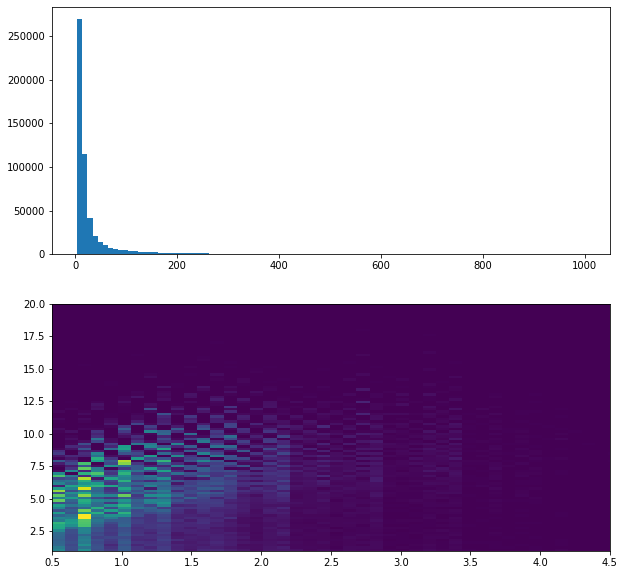

In [8]:
import math
import numpy as np
def calculateDist(df):
    # Returns distance in meter. Input is df with four coordinates.
    return calculateDistFromCord(df['sLong'],df['sLat'],df['eLong'],df['eLat'])
# Imported to python from https://stackoverflow.com/questions/6366408/calculating-distance-between-two-latitude-and-longitude-geocoordinates/51839058#51839058

def calculateDistFromCord(sLong,sLat,eLong,eLat):
    # Returns distance in meter.
    d1 = sLat * (math.pi / 180.0)
    #d1 = np.float(d1)
    d1 = d1.to_numpy()
    num1 = sLong * (math.pi / 180.0)
    num1 = num1.to_numpy()
    d2 = eLat * (math.pi / 180.0)
    d2 = d2.to_numpy()
    num2 = eLong * (math.pi / 180.0) - num1
    num2 = num2.to_numpy()
    d3 = np.power(np.sin((d2 - d1) / 2.0), 2.0) + np.cos(d1) * np.cos(d2) * np.power(np.sin(num2 / 2.0), 2.0);

    return 6376500.0 * (2.0 * np.arctan2(np.sqrt(d3), np.sqrt(1.0 - d3)))

def calculateSpeed(df):
    # Calculates km/h. Calculates distance from coordinates if no column named 'dist' is found.
    try:
        tempDist = df['dist']
    except KeyError:
        calculateDistFromCord(df['sLong'],df['sLat'],df['eLong'],df['eLat'])
    return (tempDist/1000) / (df['duration'].dt.total_seconds()/60/60)


import matplotlib.pyplot as plt
import timeit
#dfTrip = dfTrip[:5000]

dfTrip['dist'] = calculateDist(dfTrip)
dfTrip['speed'] = calculateSpeed(dfTrip)
dfTrip.head()

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1,sharey=False,figsize=(10,10) )
#ax1, ax2 = ax[0],ax[1]
ax1.hist(x=(dfTrip['duration'].dt.total_seconds()/60),bins=100,range= [4,1000])
hist2 = ax2.hist2d(x=dfTrip['dist']/1000, y=dfTrip['speed'],bins=100,range=[[0.5,10],[1,20]])
ax2.set_xlim(0.5,4.5)
ax2.set_ylim(1,20)
#fig.colorbar('test' ,cax= ax2)

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,dist,speed
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,1,1148.748684,6.265902
1,11169,2019-01-20 08:15:00,2019-01-20 11:39:00,03:24:00,8.770358,50.804522,8.770358,50.804522,1,0.000000,0.000000
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,1,781.716856,5.862876
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,1,2298.094514,9.192378
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,1,0.000000,0.000000


In [17]:
dfTrip.head()



count     630969.000000
mean           5.613305
std          387.148383
min            0.000000
1%             0.000000
5%             0.000000
25%            0.000000
50%            2.909921
75%            6.137773
95%            9.597976
99.9%         17.711870
99.99%      1002.519579
max       109506.582430
Name: speed, dtype: float64

In [97]:
dfTrip['speed'].describe(percentiles=[0.01,0.05,0.25,0.75,0.95,0.999,0.9999])

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,dist,speed
444,11168,2019-01-21 11:08:00,2019-01-21 11:11:00,00:03:00,8.75971,50.836672,8.776735,50.808887,0,3315.779286,66.315586


In [108]:
dfTrip.loc[dfTrip['speed'] >66]

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
248,True,0,2019-01-20 00:00:00,11168,first,4774572,4,50.836178,15,Wehrda Bürgerhaus,5177.0,8.756796,False
249,True,0,2019-01-20 23:59:00,11168,last,4774572,5,50.836178,15,Wehrda Bürgerhaus,5177.0,8.756796,False
1281,True,0,2019-01-21 00:00:00,11168,first,4774572,5,50.836178,15,Wehrda Bürgerhaus,5177.0,8.756796,False
1282,True,0,2019-01-21 08:29:00,11168,start,4774572,5,50.836178,15,Wehrda Bürgerhaus,5177.0,8.756796,False
1283,False,12,2019-01-21 08:31:00,11168,end,12129994,1,50.836672,15,BIKE 11168,0.0,8.759710,True
1284,False,12,2019-01-21 11:08:00,11168,start,12129994,1,50.836672,15,BIKE 11168,0.0,8.759710,True
1285,False,12,2019-01-21 11:11:00,11168,end,12133014,1,50.808887,15,BIKE 11168,0.0,8.776735,True
1286,False,12,2019-01-21 11:47:00,11168,start,12133014,1,50.808887,15,BIKE 11168,0.0,8.776735,True
1287,True,0,2019-01-21 11:56:00,11168,end,4774470,1,50.819957,15,Hauptbahnhof,5165.0,8.773736,False
1288,True,0,2019-01-21 11:57:00,11168,start,4774470,1,50.819957,15,Hauptbahnhof,5165.0,8.773736,False


In [101]:
df.loc[df['b_number'] == 11168].head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561743 entries, 0 to 1561742
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   p_spot        1561743 non-null  bool          
 1   p_place_type  1561743 non-null  int64         
 2   datetime      1561743 non-null  datetime64[ns]
 3   b_number      1561743 non-null  int64         
 4   trip          1561743 non-null  object        
 5   p_uid         1561743 non-null  int64         
 6   p_bikes       1561743 non-null  int64         
 7   p_lat         1561743 non-null  float64       
 8   b_bike_type   1561743 non-null  int64         
 9   p_name        1561743 non-null  object        
 10  p_number      1561677 non-null  float64       
 11  p_lng         1561743 non-null  float64       
 12  p_bike        1561743 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 134.0+ MB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630969 entries, 0 to 630968
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype          
---  ------    --------------   -----          
 0   bNumber   630969 non-null  int64          
 1   sTime     630969 non-null  datetime64[ns] 
 2   eTime     630969 non-null  datetime64[ns] 
 3   duration  630969 non-null  timedelta64[ns]
 4   sLong     630969 non-null  float64        
 5   sLat      630969 non-null  float64        
 6   eLong     630969 non-null  float64        
 7   eLat      630969 non-null  float64        
 8   weekend   630969 non-null  int64          
 9   dist      630969 non-null  float64        
 10  speed     630969 non-null  float64        
dtypes: datetime64[ns](2), float64(6), int64(2), timedelta64[ns](1)
memory usage: 53.0 MB


In [19]:
dfTrip.info()



Obtaining file:///C:/Users/loren/Documents/GitHub/PDS_Project
  Attempting uninstall: PDS-Project
    Found existing installation: PDS-Project 0.0.1.dev13
    Uninstalling PDS-Project-0.0.1.dev13:
      Successfully uninstalled PDS-Project-0.0.1.dev13
  Running setup.py develop for PDS-Project


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\loren\\Documents\\GitHub\\PDS_Project\\notebooks\\../data\\output/tripData.csv'

In [ ]:
!pip install -e ..
nextbike.io.output.saveTrips(dfTrip)


In [17]:
import datetime
dfTrip[dfTrip['sTime'].dt.date > datetime.date(2019,6,30)].head(5)

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber
116001,11272,2019-08-01 11:41:00,2019-08-01 15:55:00,04:14:00,8.771030,50.82022,8.771030,50.820220,False,15,5146.0,5146.0
116002,11128,2019-08-01 13:36:00,2019-08-01 13:43:00,00:07:00,8.775351,50.80807,8.775351,50.808070,False,15,5158.0,5158.0
116003,11128,2019-08-01 14:12:00,2019-08-01 14:21:00,00:09:00,8.775351,50.80807,8.775351,50.808070,False,15,5158.0,5158.0
116004,11128,2019-08-01 15:08:00,2019-08-01 15:15:00,00:07:00,8.775351,50.80807,8.775351,50.808070,False,15,5158.0,5158.0
116005,11128,2019-08-01 15:33:00,2019-08-01 15:45:00,00:12:00,8.775351,50.80807,8.770734,50.813691,False,15,5158.0,5145.0


In [ ]:
import datetime
df[df['datetime'].dt.date < datetime.date(2019,7,30)].tail(5)